In [0]:
# all pakages imported herein
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import *
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import *


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Big_mart.csv to Big_mart.csv


In [3]:
df = pd.read_csv('Big_mart.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
6              FDO10       13.650          Regular         0.012741   
7              FDP10          NaN          Low Fat         0.127470   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
10             FDY07       11.800          Low Fat         0.000000   
11             FDA03       18.500          Regular         0.045464   
12             FDX32       15.100          

In [6]:
df.shape

(8523, 12)

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)
#Replacing NaN values in feature:Item_weight
df.Outlet_Size.fillna('Missing',inplace=True)
#Replace missing value in feature:Outlet_size

In [0]:

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
#replace all change value from the pattern 

In [12]:
# Finding the correlation in the dataframe itself
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


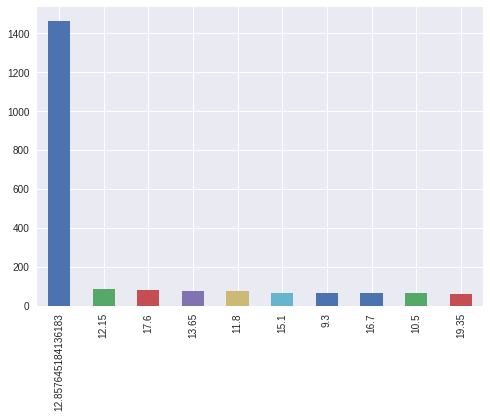

In [13]:
#bar plot for Item_weight of the data set
df['Item_Weight'].value_counts().head(10).plot.bar()

In [0]:
#The above graph shows:

#-->Presents categorical data about weights of different items.

#-->Their heights or lengths are proportional to the values that they represent.

#-->The number of items is maximum at a value 12.857.

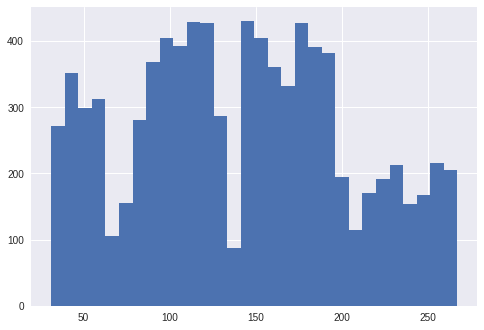

In [16]:

#Ploting histogram fot Item_mrp
plt.hist(x  = 'Item_MRP',data=df, bins=30)
sns.despine()

In [0]:
#From above graph:

#-->Values of MRP are continuous in nature.

#-->There are outliers in MRP values.

#-->MRP is maximum at 120,140 and 180.

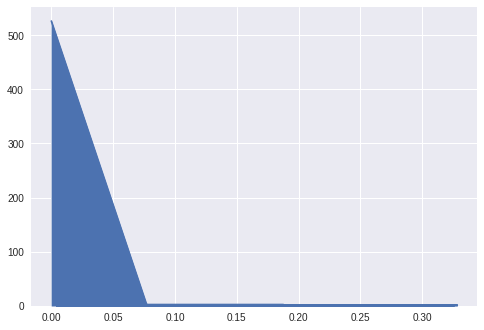

In [18]:
#Ploting area for Item_visibility
df['Item_Visibility'].value_counts().plot.area()

In [0]:
#-->The above graph shows:

#-->Area distribution for item visibility.

#-->Area visibility in the store lies between 0.0 to 0.08

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


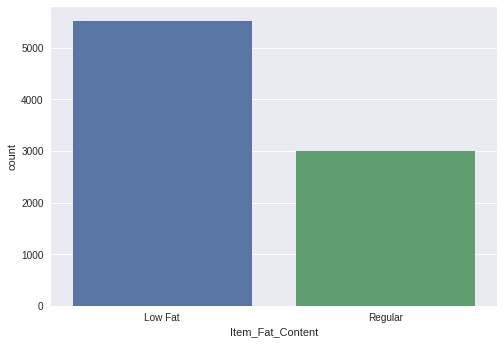

In [20]:
#Fat content of the item.
sns.countplot(x  = 'Item_Fat_Content',data=df)
sns.despine()

In [0]:
#The above graph shows:

#-->There are only two types of item- the item having low fat or regular fat.
#-->The item having low fat are very high in number and raise upto more than 5000.
#-->The item having regular fat are around 3000.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


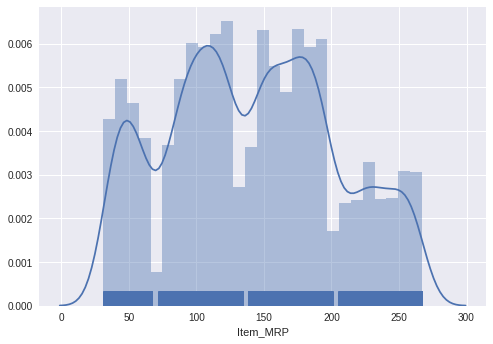

In [22]:

#distplot
sns.distplot(df['Item_MRP'], rug = True);

In [0]:
#The graph shows:

#-->The MRP lies maximum at between the range 100 to 190.
#-->Their are some outliers and data are continuous in nature.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


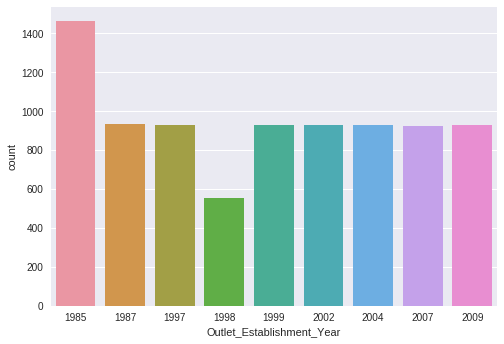

In [24]:
#countplot for the data set feature: Outlet_Establishment_year.
sns.countplot(x = 'Outlet_Establishment_Year', data = df)

In [0]:
#From above graph:

#-->Outlet establishment is maximum in 1985 and it crosses the number 1400.
#-->Outlet establishment is minimum in 1998 which was down to approx 480.
#-->Rest of the year is having same outlet establishment of approx 880.

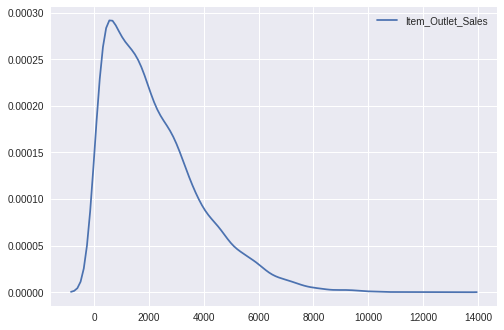

In [26]:
#Kde plot
sns.kdeplot(df['Item_Outlet_Sales'])

In [0]:
#The above graph shows, it is left screwd. Here we need to perform normalisation

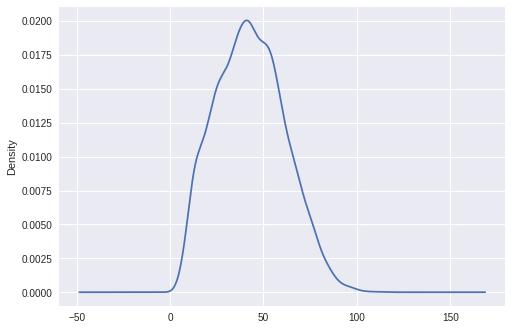

In [28]:
#plot root mean square
p = np.power(df['Item_Outlet_Sales'],1/2)
p.plot(kind = 'kde')

In [0]:
#After applying root mean square to normalise left screwed, Now the graph is better.

#-->It shows the true variation of Item sale at outlets between 0 to 100.

#-->Density for item sale is maximum to 0.0200.

#-->Bivariant Graph: . It tells us about the dependencies, association and relation between two specific features. After analysing their relation, we can remove or change the level of their dependencies on each other.

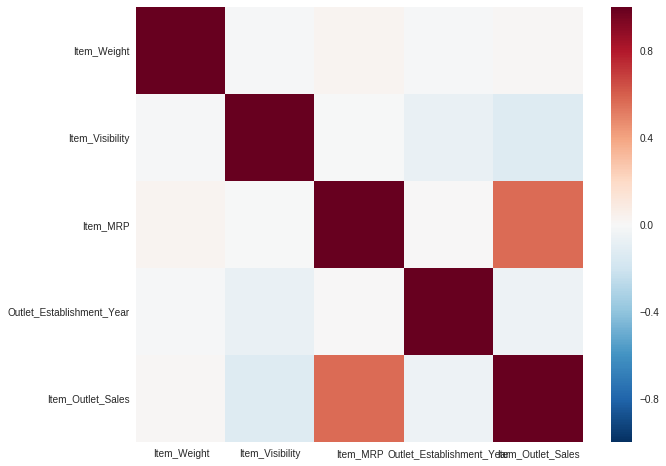

In [30]:
#plot heatmap to identify correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [0]:
#The above correlation states that.

#-->Item visibility is having almost null dependencies on Item_Outlet sales and Item _Establishment year.

#-->Item outlet sales and MRP of the item is highly inter related to each other.

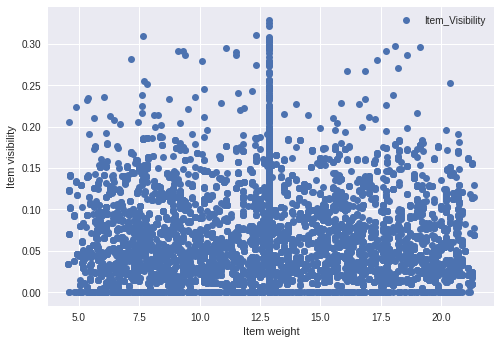

In [32]:
#plot Item_Weight Vs. Item_Visibility
df.plot(x='Item_Weight', y= 'Item_Visibility', style ='o')
plt.xlabel('Item weight')
plt.ylabel('Item visibility')
plt.show()

In [0]:
#-->The above scatter plot shows, there are many outliers in item visibility and their weight.

#-->Item weight at 12.6 is maximum and its visibility crosses beyond 0.30 percent.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


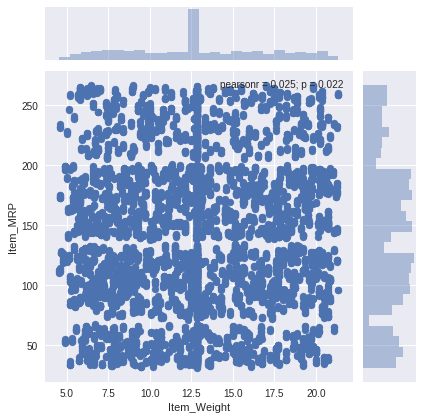

In [34]:

#jointplot between price and bedrooms
sns.jointplot(x='Item_Weight',y='Item_MRP',data=df)

In [0]:
#-->Item MRP at 12.6 and Item MRP between 75 to 200 is maximum.



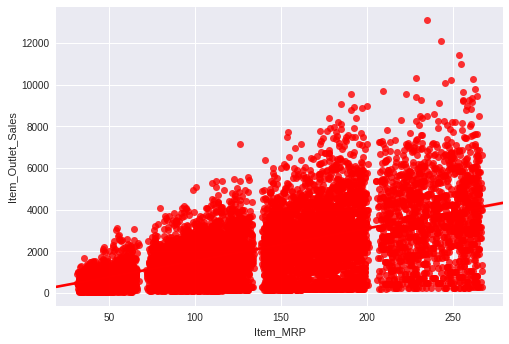

In [35]:
#regplot
sns.regplot(x = 'Item_MRP', y='Item_Outlet_Sales',data = df, color = 'red')
sns.despine()

In [0]:
#Item_outlet_Sales is directly dependent on its MRP.

#-->With increase in MRP, sale also get increases. That is good for the store.

#-->Multivariate Analysis: It help us to analyse more than two features of a data set at the same time.

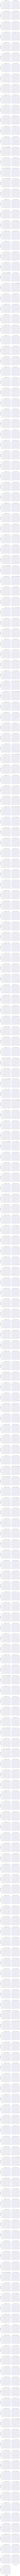

In [37]:
#facet grid
d=df.head(500)
g = sns.FacetGrid(d, col='Item_MRP',col_wrap=2)
g.map(plt.scatter,'Item_Weight','Item_Visibility',alpha = 0.2)
p=sns.despine()

In [0]:
#-->Above graph shows, Outlet establishment year VS. Item MRP and Item outlet sales.

#-->Graph is having many outliers.

#-->Outlet sales is maxmum in 1985.

In [39]:
dd = pd.get_dummies(df, columns=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content'])
dd.head(20)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,FDA15,9.300000,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,DRC01,5.920000,0.019278,48.2692,OUT018,2009,443.4228,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,FDN15,17.500000,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,FDX07,19.200000,0.000000,182.0950,OUT010,1998,732.3800,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,NCD19,8.930000,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,FDP36,10.395000,0.000000,51.4008,OUT018,2009,556.6088,1,0,0,...,0,0,0,1,0,0,1,0,0,1
6,FDO10,13.650000,0.012741,57.6588,OUT013,1987,343.5528,0,0,0,...,0,0,0,1,0,1,0,0,0,1
7,FDP10,12.857645,0.127470,107.7622,OUT027,1985,4022.7636,0,0,0,...,0,0,0,1,0,0,0,1,1,0
8,FDH17,16.200000,0.016687,96.9726,OUT045,2002,1076.5986,0,0,0,...,0,0,1,0,0,1,0,0,0,1
9,FDU28,19.200000,0.094450,187.8214,OUT017,2007,4710.5350,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [0]:
y = dd['Item_Outlet_Sales']
x = dd.drop(['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier'],axis=1)

In [0]:
#perform split on training data
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3, random_state =85)

In [42]:
regressor =  LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
regressor.score(x_test,y_test)

0.5607259789593103

In [44]:
clf = RandomForestRegressor(n_estimators=10,max_depth=6,random_state=42).fit(x_train,y_train)
results = model_selection.cross_val_score(clf, x_train,y_train)
results.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.5860705663404077

In [45]:
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
pred=gbr.predict(x_test)
gbr.score(x_test,y_test)

0.6064879155277612

In [0]:
#Summary
#Following work flow have been performed.

#Perform data cleaning using pandas library.

#Exploratory Data Analysis on the data.

#Visualize distributions and correlation of features.

#Build a regression model taking the selected features through feature engineering.

#Pedict the item_outlet_sales for the test data:

#(a) More the price of data, more will be the sale.

#(b) With increase in outlet established year the sale graph goes down.

#(c) Item visibility should also be increase to increase sale.

#Result
#Accuracy score of different regression model are:

#Linear regression :0.586

#Random Forest Regression : 0.586

#Gradient Boosting Regressor: 0.606(Maximum)